#项目2：Pokemon属性分析（EDA）
##项目目标：分组统计 + Top10排名可视化
##作者：育桦（数据分析练习）
##数据来源：公开Pokemon CSV

In [2]:
#导入库
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

#设置中文显示（避免乱码）
plt.rcParams['font.sans-serif'] = ['SimHei'] #设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False

#读取在线Pokemon数据（800+只精灵）
url="https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv"
df=pd.read_csv(url)

#初步查看
display(df.head())

print("数据形状：",df.shape)
print("\n缺失值统计：")
print(df.isnull().sum())

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


数据形状： (800, 13)

缺失值统计：
#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


###步骤1数据清洗与统计

In [3]:
# 简单清洗：用 '#' 列删重复（这个数据干净，几乎没重复）
df.drop_duplicates(subset=['#'], inplace=True)

# Type 2 有缺失正常，填'None'
df['Type 2'] = df['Type 2'].fillna('None')

# 分组统计：按主类型(Type 1)平均攻击力Top10
top_attack_type = df.groupby('Type 1')['Attack'].mean().sort_values(ascending=False).head(10)

# 最强10只Pokemon（按总战斗力Total）
top_pokemon = df.nlargest(10, 'Total')[['Name', 'Total', 'HP', 'Attack', 'Defense', 'Speed', 'Type 1']]

print("各类型平均攻击力Top10：")
display(top_attack_type)

print("\n最强10只Pokemon：")
display(top_pokemon)

各类型平均攻击力Top10：


Type 1
Dragon      102.625000
Fighting     94.720000
Ground       91.300000
Rock         88.463415
Steel        88.090909
Dark         86.250000
Fire         82.212766
Poison       74.678571
Normal       71.731183
Flying       71.666667
Name: Attack, dtype: float64


最强10只Pokemon：


,Name,Total,HP,Attack,Defense,Speed,Type 1
552,Arceus,720,120,120,120,120,Normal
162,Mewtwo,680,106,110,90,130,Psychic
269,Lugia,680,106,90,130,110,Psychic
270,Ho-oh,680,106,130,90,90,Fire
425,Rayquaza,680,105,150,90,95,Dragon
540,Dialga,680,100,120,120,90,Steel
541,Palkia,680,90,120,100,100,Water
544,GiratinaAltered Forme,680,150,100,120,90,Ghost
706,Reshiram,680,100,120,100,90,Dragon
707,Zekrom,680,100,150,120,90,Dragon


###步骤2：数据可视化

C:\Users\13417\AppData\Local\Temp\ipykernel_6696\1048061338.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_attack_type.values,y=top_attack_type.index,palette='rocket')
C:\Users\13417\AppData\Local\Temp\ipykernel_6696\1048061338.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total',y='Name',data=top_pokemon,palette='viridis')


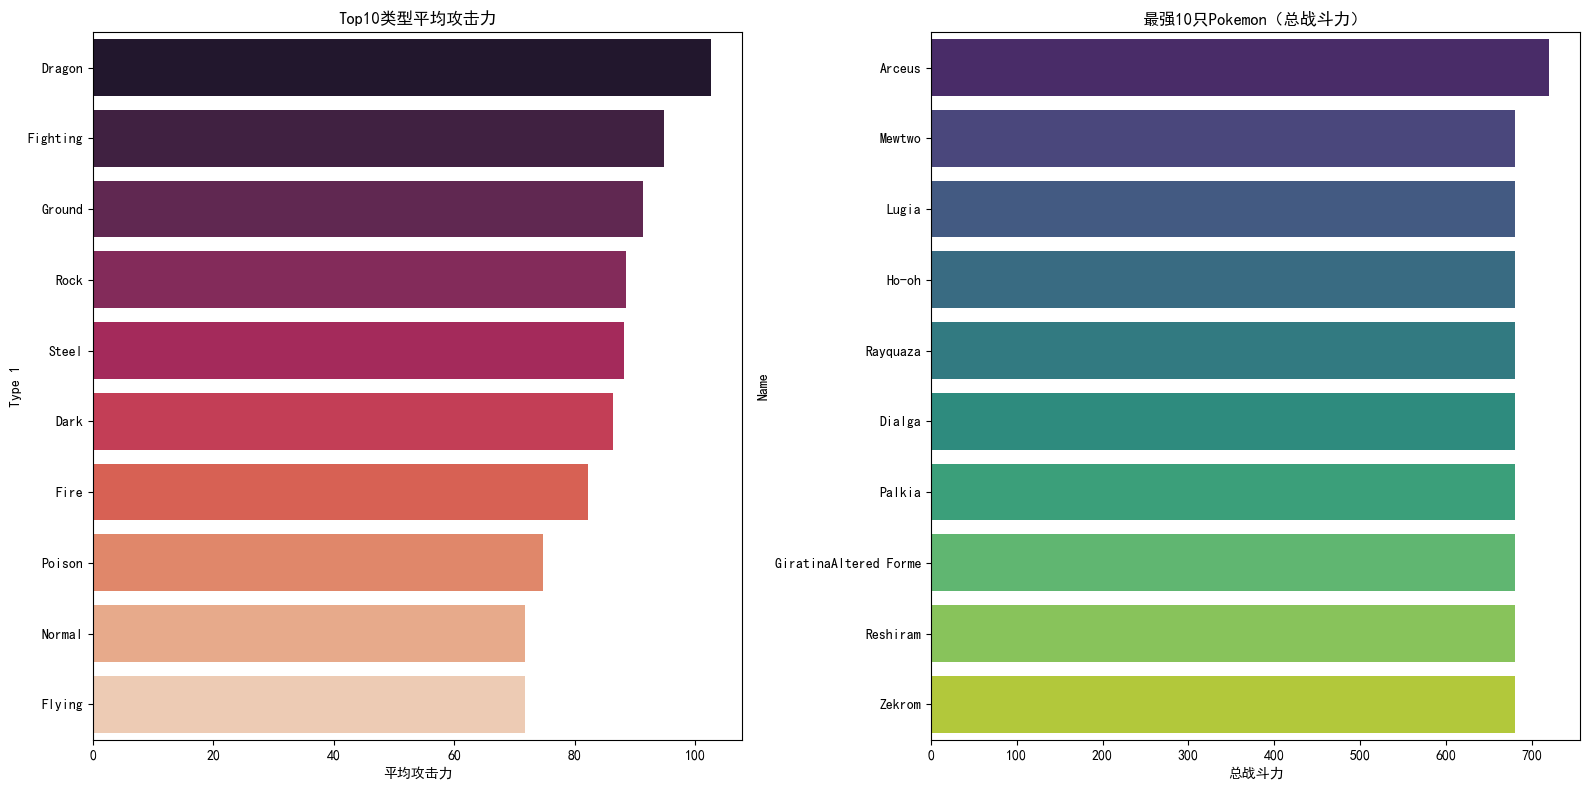

In [4]:
#设置画布
plt.figure(figsize=(16,8))

#图1：类型平均攻击力Top10（横向柱状图）
plt.subplot(1,2,1)
sns.barplot(x=top_attack_type.values,y=top_attack_type.index,palette='rocket')
plt.title('Top10类型平均攻击力')
plt.xlabel('平均攻击力')

#图2：最强10只Pokemon总战斗力
plt.subplot(1,2,2)
sns.barplot(x='Total',y='Name',data=top_pokemon,palette='viridis')
plt.title('最强10只Pokemon（总战斗力）')
plt.xlabel('总战斗力')

plt.tight_layout()
plt.show()